In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 10000

x,y = np.random.uniform(-1,1,size=(2,N))
inside = (x**2 + y**2) <= 1
pi = inside.sum() * 4/N
error = abs((pi - np.pi)/pi) *100

outside = np.invert(inside)

plt.plot(x[inside],y[inside],'b.')
plt.plot(x[outside],y[outside],'r.')
plt.plot(0,0,label='$\hat \pi$ = {:4.3f}\nerror = {:4.3f}%'.format(pi,error),alpha=0)
plt.axis('square')
plt.legend(frameon=True,framealpha=0.9,fontsize=16)

### Metropolis-Hasting算法 

In [12]:
def metropolis(func, steps = 100000):
    """A very simple Metropolis implementation """
    samples = np.zeros(steps)
    old_x = func.mean()
    old_prob = func.pdf(old_x) #PDF概率密度函数
    
    for i in range(steps):
        new_x = old_x + np.random.normal(0, 0.5)
        new_prob = func.pdf(new_x)
        acceptance = new_prob / new_x
        if acceptance >= np.random.random():
            samples[i] = new_x
            old_x = new_x
            old_prob = new_prob
        else:
            samples[i] = old_x
    return samples
        

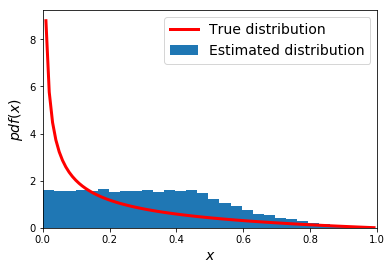

In [14]:
from scipy import stats

func = stats.beta(0.4,2)
samples = metropolis(func=func)
x = np.linspace(0.01, .99, 100)
y = func.pdf(x)
plt.xlim(0,1)
plt.plot(x, y, 'r-', lw=3, label = 'True distribution')
plt.hist(samples, bins=30,  normed=True, label='Estimated distribution')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$pdf(x)$',fontsize=14)
plt.legend(fontsize=14)

plt.show()